# CATALOGIQUE
### PUBLICATION TOPIC CLASSIFACTION
#### We organize your stuff so you don't have to

#### problem statement:
Our client at Elsevier is looking for a better way to clasify their scientific articles. Elsevier helps researchers and healthcare professionals advance science and improve health outcomes for the benefit of society. (soruce: https://www.elsevier.com/about). With the large volume of scientific research articles flowing into the pipeline, we expertly classify and store your data for quick and efficient searching.

# EDA and Modeling on combined dataframes
#### In this notebook, we will import our cleaned data and combine dataframes.

#### Imports

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Import clean datasets created in Cleaning notebook
And inpsect head

In [2]:
bio_df = pd.read_csv('datasets/bio_clean.csv')
bio_df.head()

,title,class_label
0,multiplex vaccine,0
1,be there a biology equivalent of the american ...,0
2,be in grade ap biology and the online progr...,0
3,virus dna,0
4,help for exam,0


In [3]:
phys_df = pd.read_csv('datasets/phys_clean.csv')
phys_df.head()

,title,class_label
0,re all genius,1
1,what s the space fill with,1
2,restructure of physics undergrad a dialogue,1
3,help please,1
4,think of get a phd in quantum mechanic,1


#### Concatenate biology and physics subreddit data frames
Inspect

In [4]:
sci_df = pd.concat([bio_df, phys_df])
sci_df

,title,class_label
0,multiplex vaccine,0
1,be there a biology equivalent of the american ...,0
2,be in grade ap biology and the online progr...,0
3,virus dna,0
4,help for exam,0
...,...,...
3003,how important be program for physics,1
3004,what be a follow up to stephen hawking a brief...,1
3005,parallel universe,1
3006,what do apply physicist actually do,1


#### Check for balanced classes

In [5]:
sci_df['class_label'].value_counts(normalize=True)

0    0.50322
1    0.49678
Name: class_label, dtype: float64

#### Set X and y values. Train Test Split

Set the target as the `'class_label'` column which labels which subreddit the content is from  
Added `.values.astype('str')` because they were not the right format for CountVectorizer

In [6]:
X = sci_df['title'].values.astype('str')
y = sci_df['class_label'].values.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Add custom stop words to English set

In [7]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['biology', 'physics', 'question','help', 'need', 
                                               'like', 'look', 'use', 'career', 'work', 'vs', 'know', 
                                               'book', 'science', 'happen', 'job', 'advice', 'school', 
                                               'good', 'just', 'thing', 'way', 'idea', 'long', 'high', 
                                               'student', 'start', 'different', 'problem', 'study', 
                                               'learn', 'textbook', 'understand', 'research', 
                                               'possible', 'want', 'make', 'biologist', 'physicist',
                                              'really', 'master', 'degree'])

#### Null Model

Is about 50% since we are using well balanced binary classes.

#### Instatiate Count Vectorizer and Tfidf Vectorizers for NLP

In [8]:
cvec = CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))
tvec = TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))

In [9]:
def get_metrics(y_test, y_pred): 
    
    precision = precision_score(y_test, y_pred, pos_label=None,
                                    average='weighted')             
    recall = recall_score(y_test, y_pred, pos_label=None,
                              average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')  
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, precision, recall, f1

#### Fit and Transform training and testing data for both models

In [10]:
#Count Vectorizer
X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

#Tfidf Vectorizer
X_train_tv = tvec.fit_transform(X_train)
X_test_tv = tvec.transform(X_test)

#### Count Vectorizer

In [11]:
clf = MultinomialNB(alpha=.01)
clf.fit(X_train_cv, y_train)
y_test_cv = cvec.transform(X_test)

y_pred_cv = clf.predict(y_test_cv)


accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_cv)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.792, precision = 0.794, recall = 0.792, f1 = 0.791


#### Tfidf Vectorizer

In [12]:
clf = MultinomialNB(alpha=.01)
clf.fit(X_train_tv, y_train)
y_test_tv = cvec.transform(X_test)
y_pred_tv = clf.predict(y_test_tv)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_tv)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.788, precision = 0.791, recall = 0.788, f1 = 0.787


#### Store the vectorized data in a dataframe
Inspect Data

In [13]:
X_train_df = pd.DataFrame(X_train_cv.toarray(), columns=cvec.get_feature_names())
X_train_df.head()

,ability,abiotic,able,able live,abroad,absolute,absolute zero,absorb,ac,academia,...,youtube,youtube channel,youtube video,zero,zinc,zone,zoologist,zoology,zoology ecology,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Instatiate and fit Logistic Regression Model
Using Count Vectorized Data
Evaluate using cross_val_score
C regularization set to 0.4
Best cv value = ~7. Tested 5, 7, 10, 15 

In [14]:
lr = LogisticRegression(C=.4)
lr.fit(X_train_cv, y_train)
y_pred = lr.predict(y_test_cv)

print(f'Training Score: {cross_val_score(lr, X_train_cv, y_train, cv=7).mean()}')
print(f'Test Score: {cross_val_score(lr, X_test_cv, y_test, cv=7).mean()}')

Training Score: 0.7927764326069411
Test Score: 0.7391193036354327


In [15]:
lir = LinearRegression().fit(X_train_cv, y_train)
lir.score(X_test_cv, y_pred)

-1.1510618740936884

#### Create a list of words being analyzed in Phys data set with their corresponding coefficients from logistic regression
Create a table with top 20 coefs  
Plot coefs 
Plots are optimized for presentation which makes them hard to read here. Can be converted back to black text etc. 

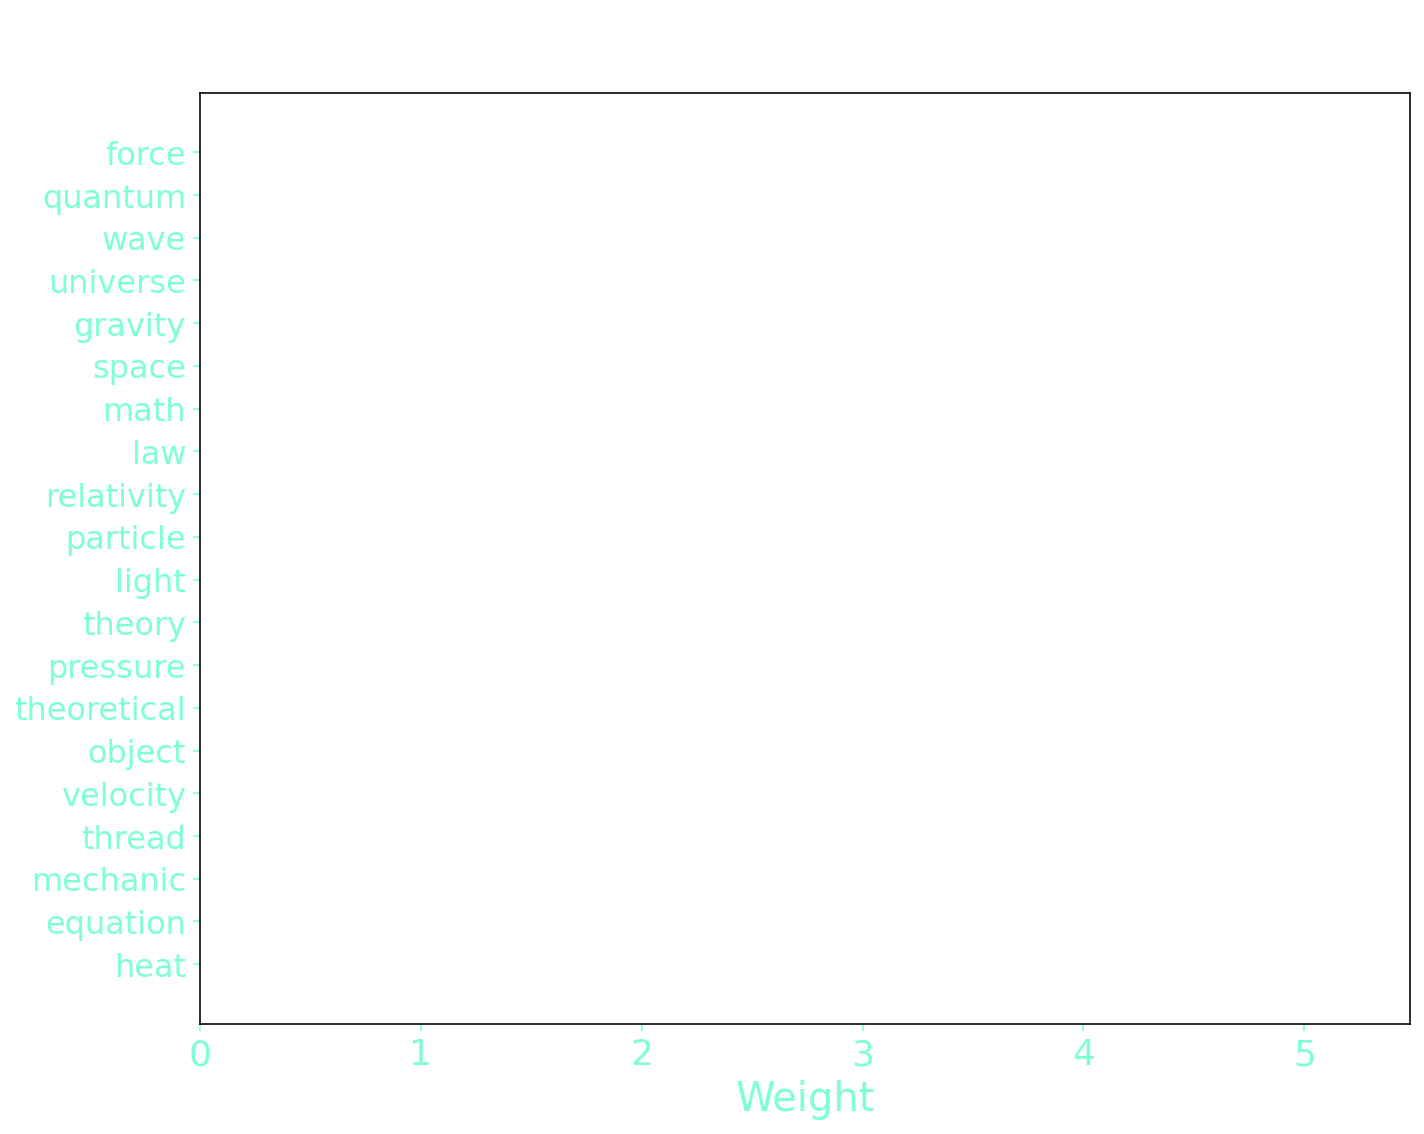

In [16]:
log_coefs = pd.DataFrame(list(zip(X_train_df, np.exp(lr.coef_[0]))))

table = log_coefs.sort_values(1, ascending=False).head(20)

plt.figure(figsize=(10,8))
# Grab physics data
plt.barh(table[0], table[1], color='white')
plt.xlabel('Weight', fontsize=20, color='aquamarine')
plt.xticks(fontsize=18, color='aquamarine' )
plt.ylim(plt.ylim()[::-1])
plt.yticks(fontsize=16, color='aquamarine')
plt.title(r"$\bf{Physics:\ Top\ Predictive\ Words}$", fontsize=24, color='white', pad=20)
plt.tick_params(color='aquamarine');
plt.savefig('Visuals/physics_word_importance.png', dpi=360, transparent=True)
plt.tight_layout();

#### Create a list of words being analyzed in Bio data set with their corresponding coefficients from logistic regression
Create a table with top 20 coefs  
Plot coefs   

Plots are optimized for presentation which makes them hard to read here. Can be converted back to black text etc. 

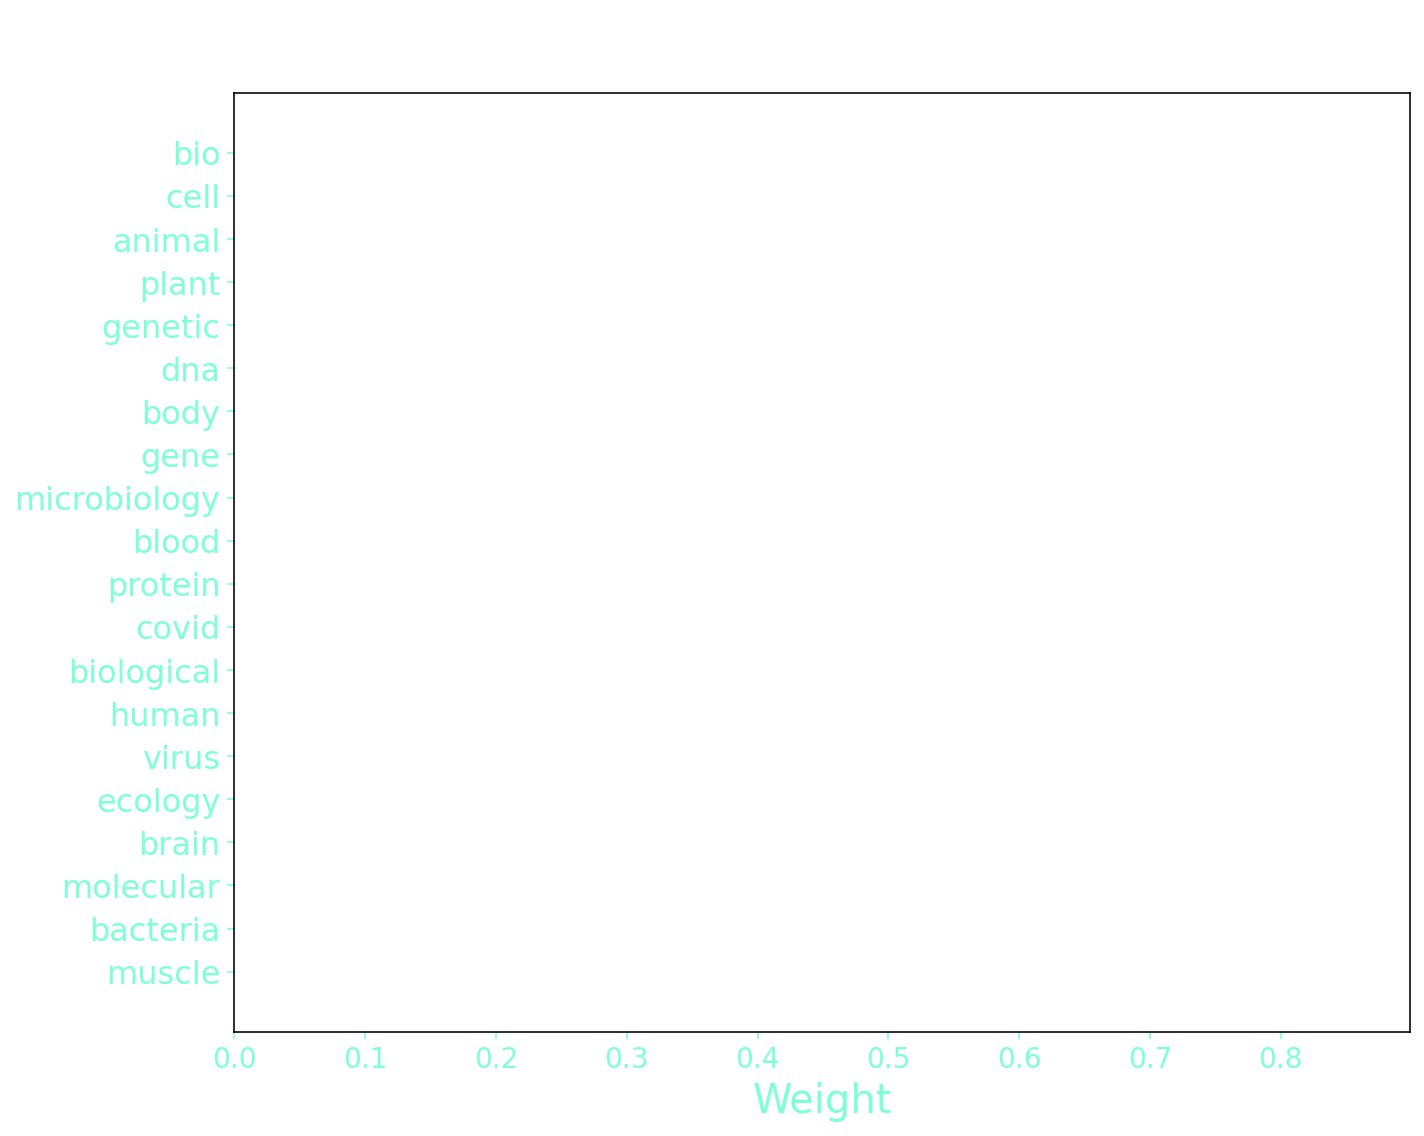

In [17]:
# table = log_coefs.sort_values(1).head(20)

# plt.figure(figsize=(6,8))
# # Grab biology data
# plt.barh(table[0], (1 - table[1]), color='mediumturquoise')
# plt.ylim(plt.ylim()[::-1])
# plt.yticks(fontsize=16)
# plt.xlabel('Weight', fontsize=20)
# plt.xticks(fontsize=18)
# plt.title('Biology: Top Predictive Words', fontsize=26);
# log_coefs = pd.DataFrame(list(zip(X_train_df, np.exp(lr.coef_[0]))))

table = log_coefs.sort_values(1).head(20)
plt.figure(figsize=(10,8))
# Grab physics data
plt.barh(table[0], (1 - table[1]), color='white')
plt.xlabel('Weight', fontsize=20, color='aquamarine')
plt.xticks(fontsize=14, color='aquamarine' )
plt.ylim(plt.ylim()[::-1])
plt.yticks(fontsize=16, color='aquamarine')
plt.title(r"$\bf{Biology:\ Top\ Predictive\ Words}$", fontsize=24, color='White', pad=20)
plt.tick_params(color='aquamarine');
plt.savefig('Visuals/biology_word_importance.png', dpi=360, transparent=True)
plt.tight_layout();

# Grid Searching
## CountVectorizer

#### Instatniate a pipeline for model testing
* count vectorizer with the optimal parameters from above
* random forest classifier




In [18]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#### Setup parameters for Grid Searching for CountVectorizer RandomForestClassifier
n_jobs are set for my machine but will be commented out in favor of settings better for the average machine

In [19]:
pipe_params = {
    'rf__min_samples_split': [14, 15, 16],
    'rf__n_jobs': [30, 34, 40] # commented out as this may not apply to other machine specs running this
#     'rf__n_jobs': [10, 12, 16]
}

#### Instantiate Grid Search
Fit data and print scores

In [20]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 23.4 µs
0.7643590193025221
{'rf__min_samples_split': 15, 'rf__n_jobs': 30}


## TfidfVectorizer

#### Instatiate pipeline for TfidfVectorizer  and RandomForestClassifier

In [21]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#### Setup parameters for Grid Searching TfidfVectorizer and RandomForestClassifier
n_jobs are set for my machine but will be commented out in favor of settings better for the average machine

In [22]:
# setting up a parameter grid to search over
pipe_params = {
    # different parameter combinations to search over
    'rf__min_samples_split': [11, 12, 13, 14, 15],
    'rf__n_jobs': [30, 34, 40] # commented out as this only applies for my machine specs
#     'rf__n_jobs': [10, 12, 16]
}

#### Instantiate Grid Search
Fit data and print scores

In [23]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_score_)
gs.best_params_

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.6 µs
0.7683248954435395


{'rf__min_samples_split': 12, 'rf__n_jobs': 30}

#### Instantiate Random Forect Classifier
Fit model
Use optimal parameters from grid search

Print scores

In [24]:
rf = RandomForestClassifier(min_samples_split=13, n_jobs=-1)
rf.fit(X_train_cv, y_train)

print(f'Training Score: {cross_val_score(rf, X_train_cv, y_train, cv=5).mean()}')
print(f'Test Score: {cross_val_score(rf, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.7672310182560105
Test Score: 0.7186217297226412


## KNN

#### Instatiate pipeline for CountVectorizer  and KNeighborsClassifier

In [25]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])

#### Setup parameters for Grid Searching CountVectorizer and KNeighborsClassifier

In [26]:
pipe_params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]
}

#### Instantiate Grid Search
Fit data and print scores

In [27]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
0.6529319968585506


{'knn__n_neighbors': 1}

#### Instatiate pipeline for TfidfVectorizer  and KNeighborsClassifier
Set Params

In [28]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'knn__n_neighbors': [2, 3, 5, 7, 9, 11, 13]
}

#### Instantiate Grid Search
Fit data and print scores

In [29]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6511747825307148


{'knn__n_neighbors': 2}

#### Run KNN Model with optemized params

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_cv, y_train)

print(f'Training Score: {cross_val_score(knn, X_train_cv, y_train, cv=7).mean()}')
print(f'Test Score: {cross_val_score(knn, X_test_cv, y_test, cv=7).mean()}')

Training Score: 0.6606405730699516
Test Score: 0.6361245214931851


# Confusion Matrix

In [31]:
from matplotlib import cm
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30, color='white', pad=20)
    color_bar = plt.colorbar(fraction=0.046, pad=0.04)
    plt.setp(plt.getp(color_bar.ax.axes, 'yticklabels'), color='aquamarine')
    color_bar.ax.yaxis.set_tick_params(color='aquamarine')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20, color='aquamarine')
    plt.yticks(tick_marks, classes, fontsize=20, color='aquamarine')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="teal" if cm[i, j] < thresh else "white", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=26, color='white')
    plt.xlabel('Predicted label', fontsize=26, color='white')

    return plt

Plots are optimized for presentation which makes them hard to read here. Can be converted back to black text etc. 

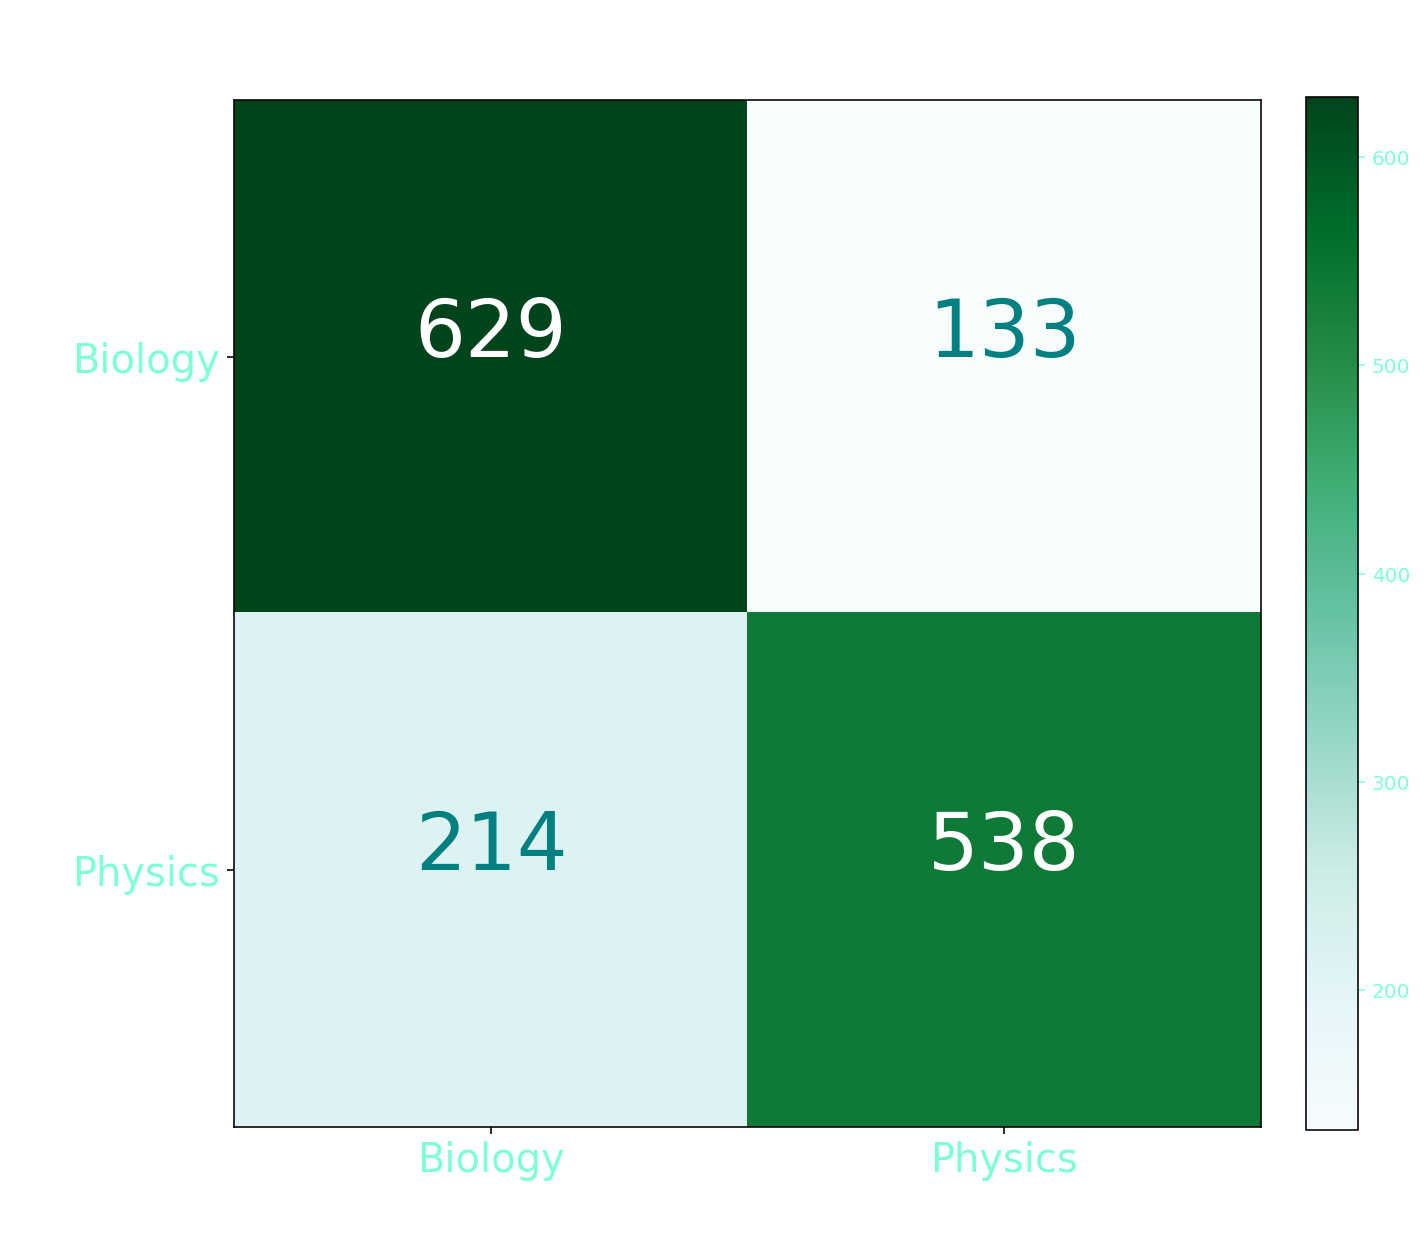

In [32]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Biology','Physics'], normalize=False, title='Confusion matrix')
plt.savefig('Visuals/confusion_matrix.png', dpi=360, transparent=True)
plt.tight_layout();

In [33]:
confusion_matrix(y_test, y_pred)

array([[629, 133],
       [214, 538]])